#### <div>
<img src="https://www.ul.ie/themes/custom/ul/logo.svg" width="350"/>
</div>

# **Artificial Intelligence - MSc**

## CS6462 - PROBABILISTIC AND EXPLAINABLE AI
## SEM2 2024/25

### CS6462 Assignment 3 - Causal Graphical Model vs Bayesian Graphical Model

### Instructor: Emil Vassev
April 8th, 2025
<br><br>
Copyright (C) 2025 - All rights reserved, do not copy or distribute without permission of the author.
***

## Submission Info
### Student Name: <span style="color:red">TODO: Aryank </span>
### Student Surname: <span style="color:red">TODO: Gupta </span>
### Student ID: <span style="color:red">TODO: 24101613 </span>
### Date of Final Submission: <span style="color:red">TODO: 23/04/2025 </span>
***

## Task
In this e-tivity, you are asked to build a Causal Graphical Model by using the <b>causalgraphicalmodels</b> library and do interventions on this model. Then you are asked to build the same model but as a Bayesian Network by using the <b>BayesianNetwork</b> construct of the <b>pgmpy.models</b> library. Both models need to cover a real-life scenario targeting getting late at work.

## The real-life scenario

Here, you can find a set of random variables X = {X1, X2, ... , X12}:
<li>X1 = “late for work”</li>
<li>X2 = “low speed due to long vehicle queues”</li>
<li>X3 = “traffic jam”</li>
<li>X4 = “traffic accident”</li>
<li>X5 = “heavy rain”</li>
<li>X6 = “snow”</li>
<li>X7 = “slippery road”</li>
<li>X8 = “getting up late”</li>
<li>X9 = “road is blocked”</li>
<li>X10 = “taking a longer alternative route”</li>
<li>X11 = “car malfunction”</li>
<li>X12 = “car towing”</li>

Use your logic to build a <b>realistic</b> causal network, which then can be transformed to a Bayesian Network (Causal Bayesian Network). In this network, the parent-child relationships should be deduced based on your logic. You need to use all the random variables.
    
### Here are the steps you need to follow:

## Step 1: Create and Execute the Causal Network (50%)

### Step 1.1. Describe your logic of deducing the causal relationships. (10%)
Outline the problem in terms of:
<li>causal dependencies among the random variables</li>
<li>short rationale on the parent-child relationships</li>    


<span style="color:red">
According to my Understanding, To construct a realistic model for the scenario "being late for work," I approached the problem by categorizing the contributing factors into two main sources: delays caused by human actions and those resulting from environmental or technical conditions. Root causes in this context include waking up late (X8), heavy rainfall (X5), snowfall (X6), and vehicle malfunction (X11). These variables initiate distinct causal chains that may ultimately lead to the outcome of being late for work (X1). I considered these as top-level variables since they are often independent and external to the commuting process itself but can significantly influence it.

The first chain of events originates from human behavior. Waking up late (X8) directly contributes to being late (X1), representing a straightforward man-made delay. On the other hand, environmental factors such as rain or snow (X5, X6) can cause roads to become slippery (X7). Slippery roads increase the chances of traffic accidents (X4), which in turn may result in either traffic jams (X3) or road blockages (X9). Traffic jams lead to low driving speeds (X2), while road blockages may force a longer alternative route (X10). Both outcomes contribute to the delay in reaching work. Similarly, if a car malfunctions (X11), it may result in the vehicle being towed (X12), which also increases the likelihood of being late (X1).

Bringing these chains together, the final set of variables that directly impact the likelihood of arriving late includes low speed (X2), waking up late (X8), taking a longer route (X10), and car towing (X12). These serve as immediate precursors to the target outcome and are influenced by the cascading effects of other variables. By organizing the structure into logical layers—starting from root causes, followed by intermediate disruptions, and ending with direct effects—I ensured that the causal relationships remain intuitive, realistic, and analytically coherent.








</span>

### Step 1.2: Create and show the Causal DAG (30%)

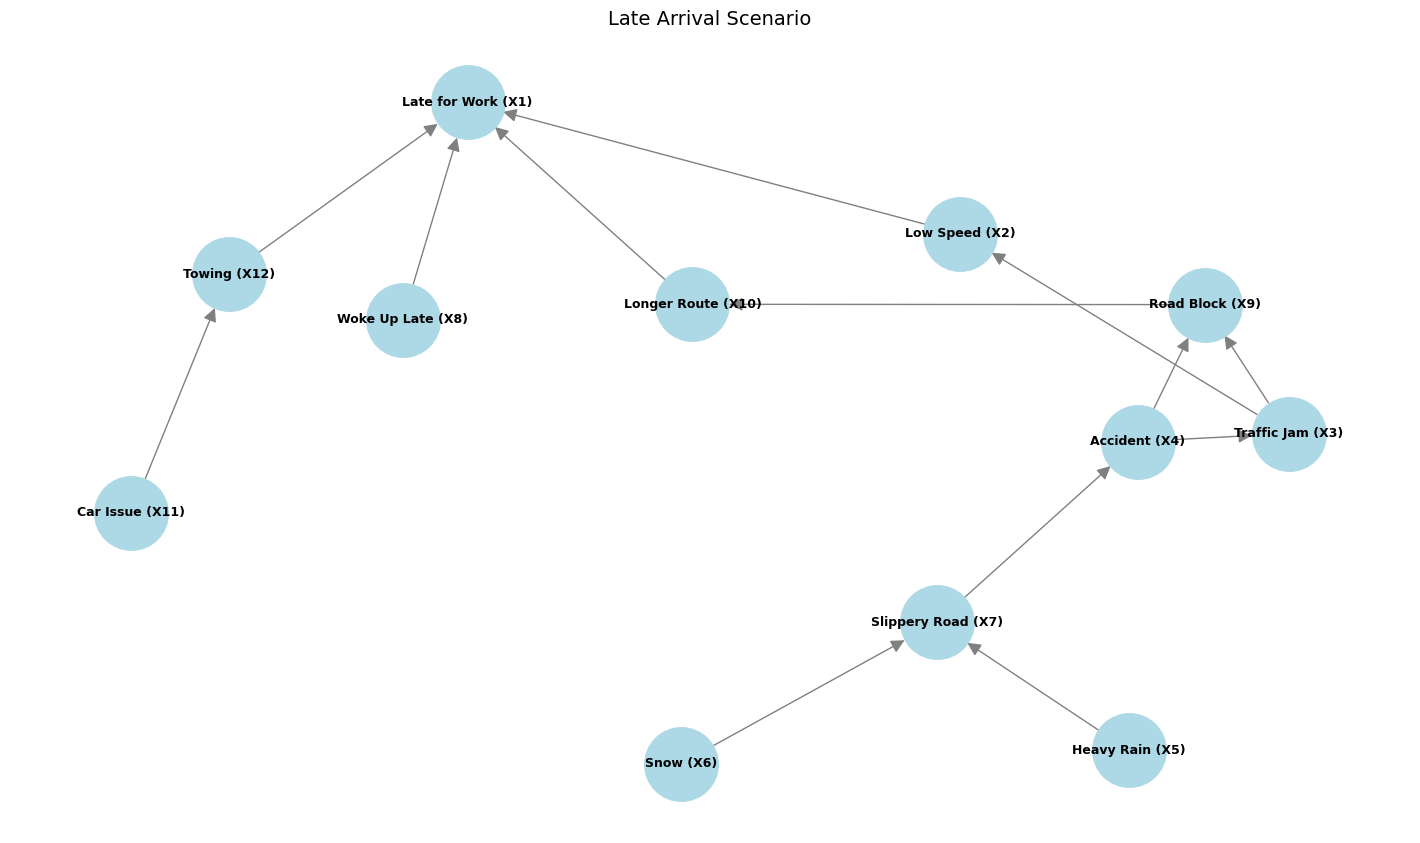

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
delay_graph = nx.DiGraph()

# Updated node labels with format: Label (Xn)
node_labels = {
    "X1": "Late for Work (X1)",
    "X2": "Low Speed (X2)",
    "X3": "Traffic Jam (X3)",
    "X4": "Accident (X4)",
    "X5": "Heavy Rain (X5)",
    "X6": "Snow (X6)",
    "X7": "Slippery Road (X7)",
    "X8": "Woke Up Late (X8)",
    "X9": "Road Block (X9)",
    "X10": "Longer Route (X10)",
    "X11": "Car Issue (X11)",
    "X12": "Towing (X12)"
}

# Add nodes
delay_graph.add_nodes_from(node_labels.keys())

# Define causal edges
causal_edges = [
    ("X8", "X1"),
    ("X5", "X7"),
    ("X6", "X7"),
    ("X7", "X4"),
    ("X4", "X3"),
    ("X3", "X2"),
    ("X2", "X1"),
    ("X4", "X9"),
    ("X3", "X9"),
    ("X9", "X10"),
    ("X10", "X1"),
    ("X11", "X12"),
    ("X12", "X1")
]

# Add edges
delay_graph.add_edges_from(causal_edges)

# Draw the graph with text inside nodes
plt.figure(figsize=(14, 8))
layout = nx.spring_layout(delay_graph, seed=42)

nx.draw(delay_graph, pos=layout, with_labels=False,
        node_color='lightblue', node_size=2800, edge_color='gray', arrowsize=20)

# Draw labels inside the nodes
for node, (x, y) in layout.items():
    plt.text(x, y, node_labels[node], fontsize=9, ha='center', va='center', weight='bold')

plt.title("Late Arrival Scenario", fontsize=14)
plt.axis('off')
plt.show()


### Step 1.3: Show the Joint Distibution of the Causal Network (1%)

In [6]:
joint_dist_parts = []

# Construct joint distribution based on parent relationships
for node in delay_graph.nodes():
    parents = list(delay_graph.predecessors(node))
    if parents:
        joint_dist_parts.append(f"P({node} | {', '.join(parents)})")
    else:
        joint_dist_parts.append(f"P({node})")

# Combine all parts into a single factorized expression
joint_distribution = " * ".join(joint_dist_parts)

# Final output
print("Joint Distribution of the Causal Network:\n")
print(f"P({', '.join(delay_graph.nodes())}) = {joint_distribution}")


Joint Distribution of the Causal Network:

P(X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12) = P(X1 | X8, X2, X10, X12) * P(X2 | X3) * P(X3 | X4) * P(X4 | X7) * P(X5) * P(X6) * P(X7 | X5, X6) * P(X8) * P(X9 | X4, X3) * P(X10 | X9) * P(X11) * P(X12 | X11)


### Step 1.4: Run the intervention do(“road is blocked”) (7%)

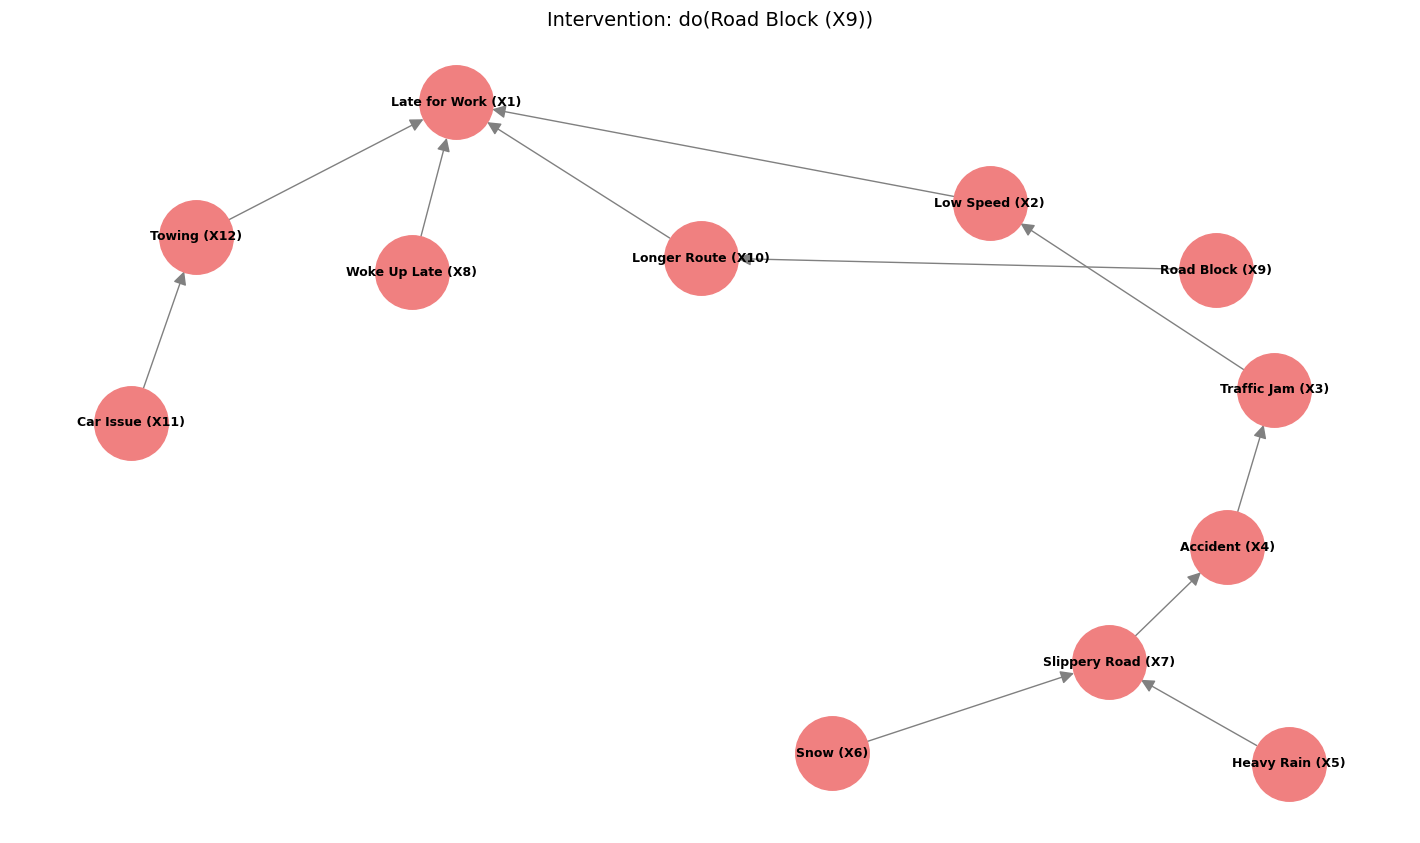

In [7]:
import copy
import matplotlib.pyplot as plt

# Create a copy of the graph to simulate intervention
intervened_graph = copy.deepcopy(delay_graph)

# Simulate do(X9): remove all incoming edges to X9
intervened_graph.remove_edges_from(list(intervened_graph.in_edges("X9")))

# Draw the intervened graph
plt.figure(figsize=(14, 8))
layout = nx.spring_layout(intervened_graph, seed=42)
nx.draw(intervened_graph, pos=layout, with_labels=False,
        node_color='lightcoral', node_size=2800, edge_color='gray', arrowsize=20)

# Label nodes as before
for node, (x, y) in layout.items():
    label = node_labels[node]  # use the same label dictionary from earlier
    plt.text(x, y, label, fontsize=9, ha='center', va='center', weight='bold')

plt.title("Intervention: do(Road Block (X9))", fontsize=14)
plt.axis('off')
plt.show()


### Step 1.5: Show the Causal DAG with the intervention "on" (1%)

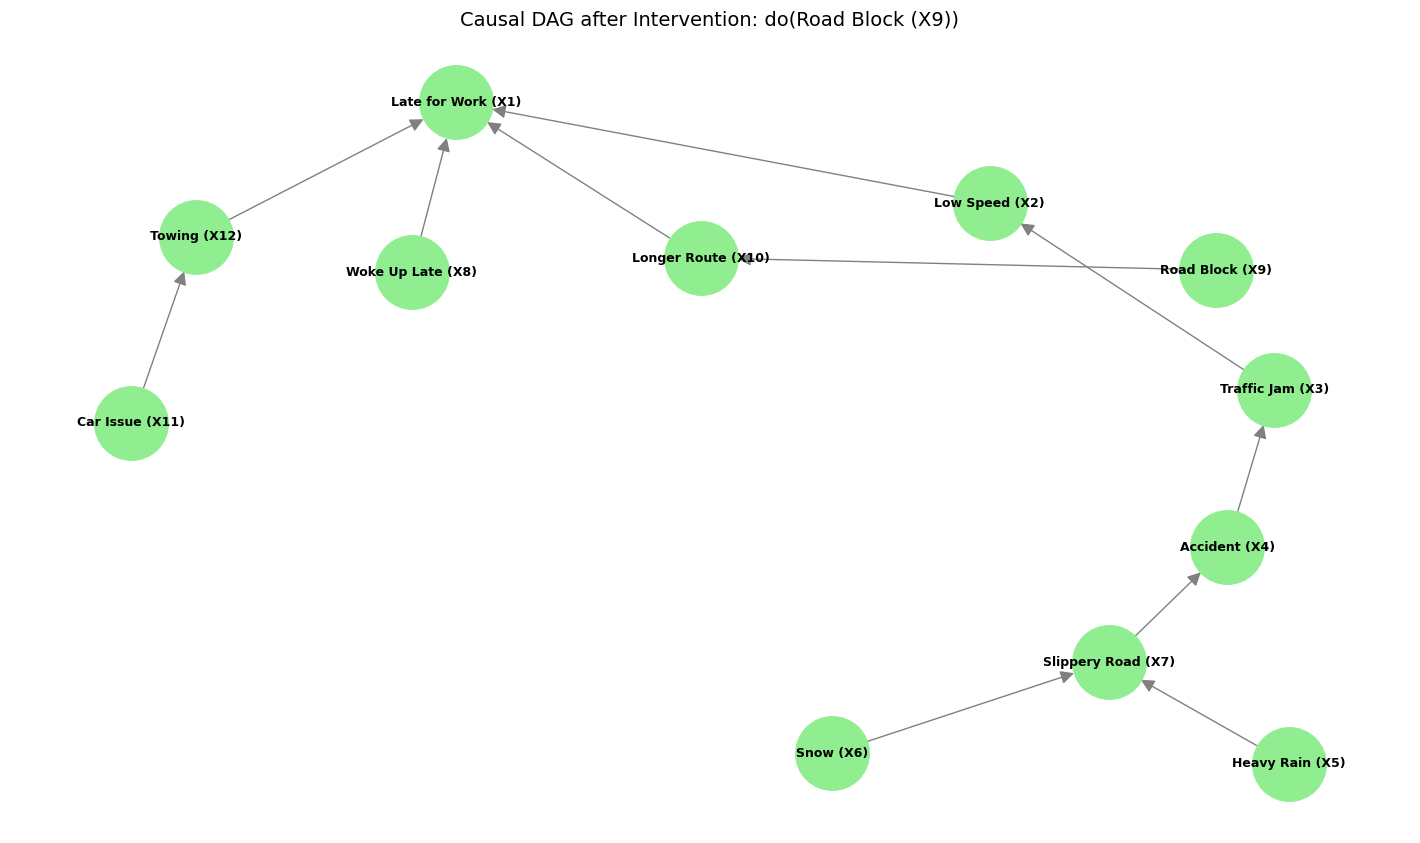

In [8]:
# Step 1.5: Display the Causal DAG with intervention applied on X9 (Road Block)

plt.figure(figsize=(14, 8))
layout = nx.spring_layout(intervened_graph, seed=42)

# Draw intervened graph
nx.draw(intervened_graph, pos=layout, with_labels=False,
        node_color='lightgreen', node_size=2800, edge_color='gray', arrowsize=20)

# Add node labels inside the nodes
for node, (x, y) in layout.items():
    label = node_labels[node]  # reuse the node label dictionary
    plt.text(x, y, label, fontsize=9, ha='center', va='center', weight='bold')

plt.title("Causal DAG after Intervention: do(Road Block (X9))", fontsize=14)
plt.axis('off')
plt.show()


### Step 1.6: Show the Joint Distibution of the Causal Network with the intervention "on" (1%)

In [9]:
# Step 1.6: Joint Distribution with do(X9) applied

intervened_joint_parts = []

# Loop through each node and construct distribution excluding incoming edges to X9
for node in intervened_graph.nodes():
    parents = list(intervened_graph.predecessors(node))
    if parents:
        intervened_joint_parts.append(f"P({node} | {', '.join(parents)})")
    else:
        intervened_joint_parts.append(f"P({node})")

# Join all probability terms into one joint distribution string
intervened_joint_distribution = " * ".join(intervened_joint_parts)

# Output the result
print("Joint Distribution After Intervention do(X9):\n")
print(f"P({', '.join(intervened_graph.nodes())}) = {intervened_joint_distribution}")


Joint Distribution After Intervention do(X9):

P(X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12) = P(X1 | X8, X2, X10, X12) * P(X2 | X3) * P(X3 | X4) * P(X4 | X7) * P(X5) * P(X6) * P(X7 | X5, X6) * P(X8) * P(X9) * P(X10 | X9) * P(X11) * P(X12 | X11)


***
## Note
In <b>Step 2</b> you need to transform the model, you have built in Step 1, to a Bayesian Network. Here, you will need to repeat some of the activities you have already done in Assignment 2. Please, consider all the random variables <b>X</b> binary and the probability distribution of each variable as <b>{true=50%, false=50%}</b>.
***

## Step 2: Create and Execute the Bayesian Network (50%)

### Step 2.1: Create and show the DAG of the Bayesian Network (20%)

In [10]:
# use the pgmpy library: "from pgmpy.models import BayesianNetwork"
!pip install pgmpy

from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import matplotlib.pyplot as plt


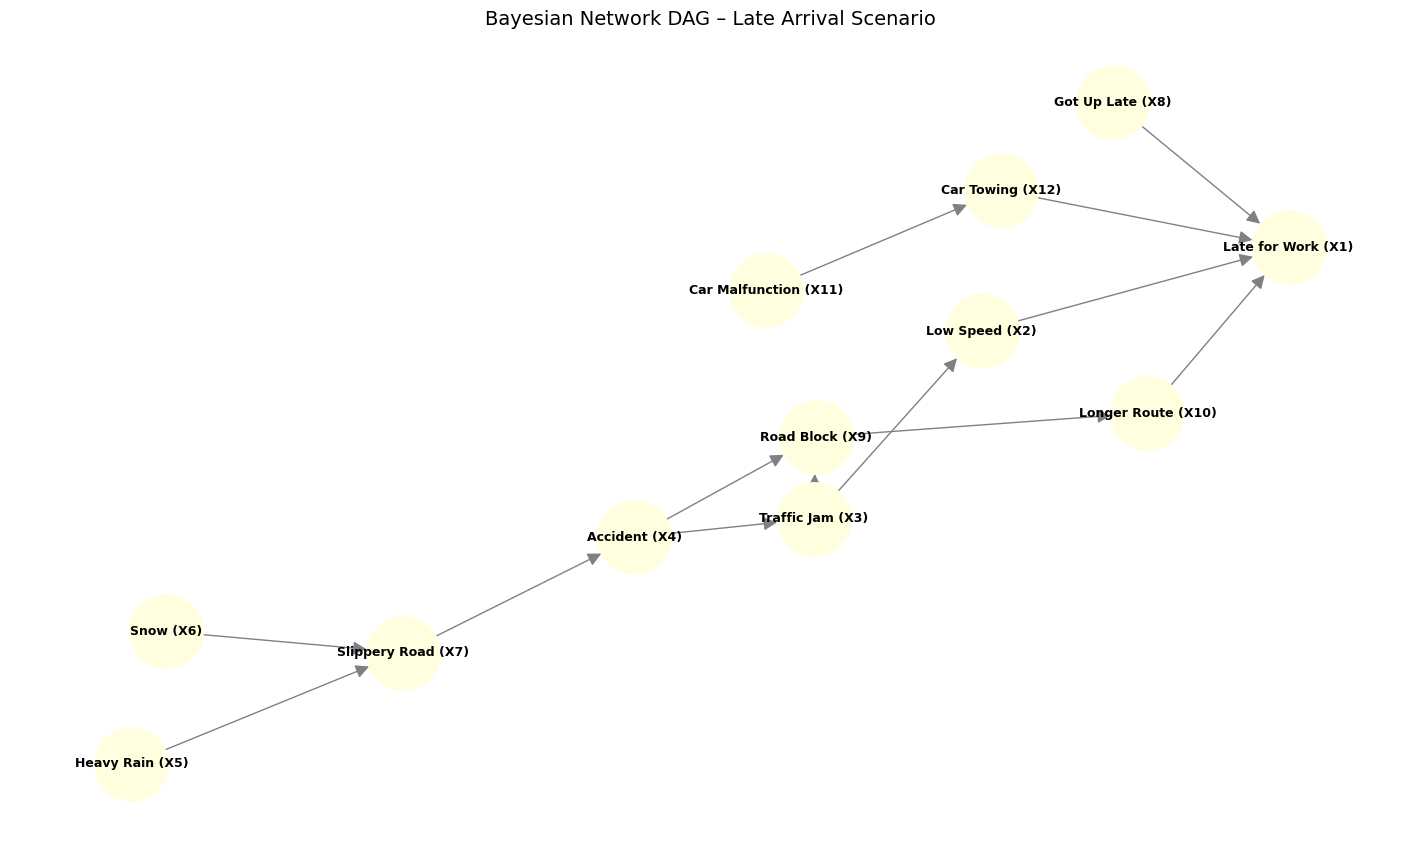

In [11]:
# Define the edges based on the Bayesian Network structure
bn_edges = [
    ("X8", "X1"),      # Getting Up Late → Late for Work
    ("X5", "X7"),      # Heavy Rain → Slippery Road
    ("X6", "X7"),      # Snow → Slippery Road
    ("X7", "X4"),      # Slippery Road → Traffic Accident
    ("X4", "X3"),      # Traffic Accident → Traffic Jam
    ("X3", "X2"),      # Traffic Jam → Low Speed
    ("X2", "X1"),      # Low Speed → Late for Work
    ("X4", "X9"),      # Traffic Accident → Road Blocked
    ("X3", "X9"),      # Traffic Jam → Road Blocked
    ("X9", "X10"),     # Road Blocked → Longer Route
    ("X10", "X1"),     # Longer Route → Late for Work
    ("X11", "X12"),    # Car Malfunction → Car Towing
    ("X12", "X1")      # Car Towing → Late for Work
]

# Create a directed graph
G_bn = nx.DiGraph()
G_bn.add_edges_from(bn_edges)

# Node labels (formatted)
node_labels = {
    "X1": "Late for Work (X1)",
    "X2": "Low Speed (X2)",
    "X3": "Traffic Jam (X3)",
    "X4": "Accident (X4)",
    "X5": "Heavy Rain (X5)",
    "X6": "Snow (X6)",
    "X7": "Slippery Road (X7)",
    "X8": "Got Up Late (X8)",
    "X9": "Road Block (X9)",
    "X10": "Longer Route (X10)",
    "X11": "Car Malfunction (X11)",
    "X12": "Car Towing (X12)"
}

# Draw the DAG using spring layout
plt.figure(figsize=(14, 8))
layout = nx.spring_layout(G_bn, seed=42)
nx.draw(G_bn, pos=layout, with_labels=False, node_color='lightyellow',
        node_size=2800, edge_color='gray', arrowsize=20)

# Draw custom labels inside the nodes
for node, (x, y) in layout.items():
    plt.text(x, y, node_labels[node], fontsize=9, ha='center', va='center', weight='bold')

plt.title("Bayesian Network DAG – Late Arrival Scenario", fontsize=14)
plt.axis('off')
plt.show()


### Step 2.2: Create the Conditional Probability Distributions of the Bayesian Network (20%)

#### Step 2.2.1: Build the probability distribution tables with TabularCPD (16%)

In [19]:
# Recreate a fresh model to avoid warnings
model = DiscreteBayesianNetwork([
    ("X8", "X1"),
    ("X5", "X7"),
    ("X6", "X7"),
    ("X7", "X4"),
    ("X4", "X3"),
    ("X3", "X2"),
    ("X2", "X1"),
    ("X4", "X9"),
    ("X3", "X9"),
    ("X9", "X10"),
    ("X10", "X1"),
    ("X11", "X12"),
    ("X12", "X1")
])

# Define all CPDs (no changes to logic)
cpd_X5 = TabularCPD('X5', 2, [[0.4], [0.6]])
cpd_X6 = TabularCPD('X6', 2, [[0.3], [0.7]])
cpd_X8 = TabularCPD('X8', 2, [[0.1], [0.9]])
cpd_X11 = TabularCPD('X11', 2, [[0.01], [0.99]])

cpd_X4 = TabularCPD('X4', 2, [[0.8, 0.3], [0.2, 0.7]], evidence=['X7'], evidence_card=[2])
cpd_X3 = TabularCPD('X3', 2, [[0.9, 0.4], [0.1, 0.6]], evidence=['X4'], evidence_card=[2])
cpd_X2 = TabularCPD('X2', 2, [[0.7, 0.2], [0.3, 0.8]], evidence=['X3'], evidence_card=[2])
cpd_X10 = TabularCPD('X10', 2, [[0.6, 0.1], [0.4, 0.9]], evidence=['X9'], evidence_card=[2])
cpd_X12 = TabularCPD('X12', 2, [[0.5, 0.2], [0.5, 0.8]], evidence=['X11'], evidence_card=[2])

cpd_X7 = TabularCPD('X7', 2,
                    [[0.9, 0.6, 0.4, 0.1],
                     [0.1, 0.4, 0.6, 0.9]],
                    evidence=['X5', 'X6'],
                    evidence_card=[2, 2])

cpd_X9 = TabularCPD('X9', 2,
                    [[0.7, 0.4, 0.3, 0.1],
                     [0.3, 0.6, 0.7, 0.9]],
                    evidence=['X4', 'X3'],
                    evidence_card=[2, 2])

cpd_X1 = TabularCPD('X1', 2,
                    [[0.9, 0.6, 0.4, 0.2, 0.3, 0.1, 0.05, 0.01,
                      0.9, 0.6, 0.4, 0.2, 0.3, 0.1, 0.05, 0.01],
                     [0.1, 0.4, 0.6, 0.8, 0.7, 0.9, 0.95, 0.99,
                      0.1, 0.4, 0.6, 0.8, 0.7, 0.9, 0.95, 0.99]],
                    evidence=['X8', 'X2', 'X12', 'X10'],
                    evidence_card=[2, 2, 2, 2])

# Add all CPDs to the fresh model
model.add_cpds(
    cpd_X5, cpd_X6, cpd_X8, cpd_X11,
    cpd_X4, cpd_X3, cpd_X2, cpd_X10,
    cpd_X12, cpd_X7, cpd_X9, cpd_X1
)



#### Step 2.2.2: Associate the distribution models with the network structure (2%)

In [21]:
# Print all CPDs to show they are linked to the network
print("CPDs associated with the network:")
for cpd in model.get_cpds():
    print(cpd)

CPDs associated with the network:
+-------+-----+
| X5(0) | 0.4 |
+-------+-----+
| X5(1) | 0.6 |
+-------+-----+
+-------+-----+
| X6(0) | 0.3 |
+-------+-----+
| X6(1) | 0.7 |
+-------+-----+
+-------+-----+
| X8(0) | 0.1 |
+-------+-----+
| X8(1) | 0.9 |
+-------+-----+
+--------+------+
| X11(0) | 0.01 |
+--------+------+
| X11(1) | 0.99 |
+--------+------+
+-------+-------+-------+
| X7    | X7(0) | X7(1) |
+-------+-------+-------+
| X4(0) | 0.8   | 0.3   |
+-------+-------+-------+
| X4(1) | 0.2   | 0.7   |
+-------+-------+-------+
+-------+-------+-------+
| X4    | X4(0) | X4(1) |
+-------+-------+-------+
| X3(0) | 0.9   | 0.4   |
+-------+-------+-------+
| X3(1) | 0.1   | 0.6   |
+-------+-------+-------+
+-------+-------+-------+
| X3    | X3(0) | X3(1) |
+-------+-------+-------+
| X2(0) | 0.7   | 0.2   |
+-------+-------+-------+
| X2(1) | 0.3   | 0.8   |
+-------+-------+-------+
+--------+-------+-------+
| X9     | X9(0) | X9(1) |
+--------+-------+-------+
| X10(0) 

#### Step 2.2.3: Check the model (2%)

In [22]:
# Step 2.2.3: Check if the model is correctly structured with valid CPDs

# This will return True if the model is valid, otherwise it will raise an error
print("Is the Bayesian Network model valid?")
print(model.check_model())


Is the Bayesian Network model valid?
True


### Step 2.3: Infer Posterior Probability of “road is blocked” considering "late for work" as evidence. (10%)

In [ ]:
# show the probability results
# your code goes here:

In [23]:
# Step 2.3: Infer P(road is blocked | late for work)

from pgmpy.inference import VariableElimination

# Initialize inference object
infer = VariableElimination(model)

# Query: What is the probability that the road is blocked given that the person is late for work?
posterior_X9_given_X1 = infer.query(variables=["X9"], evidence={"X1": 1})

# Display the result
print("P(Road is Blocked | Late for Work):")
print(posterior_X9_given_X1)


P(Road is Blocked | Late for Work):
+-------+-----------+
| X9    |   phi(X9) |
+=======+===========+
| X9(0) |    0.3799 |
+-------+-----------+
| X9(1) |    0.6201 |
+-------+-----------+
